# Global Food Wastage Datase (2018- 2024)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

df =pd.read_csv(r"D:\Global_food_wastage_dataset_(2018-2024)\global_food_wastage_dataset.csv")

#display the first 5 row of dataset
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [9]:
#display 1- no. of entries, 2- no. of column with name, 3-datatypes, 4-memory used
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [11]:
#diplay information about numeric column like count, mean, min, max values etc..
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


Data Cleaning and Preprocessing

In [14]:
#checking null values in each column

df.isnull().sum()    #gives sum of null values in each column

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

# Which Country Wastes the Most Food?

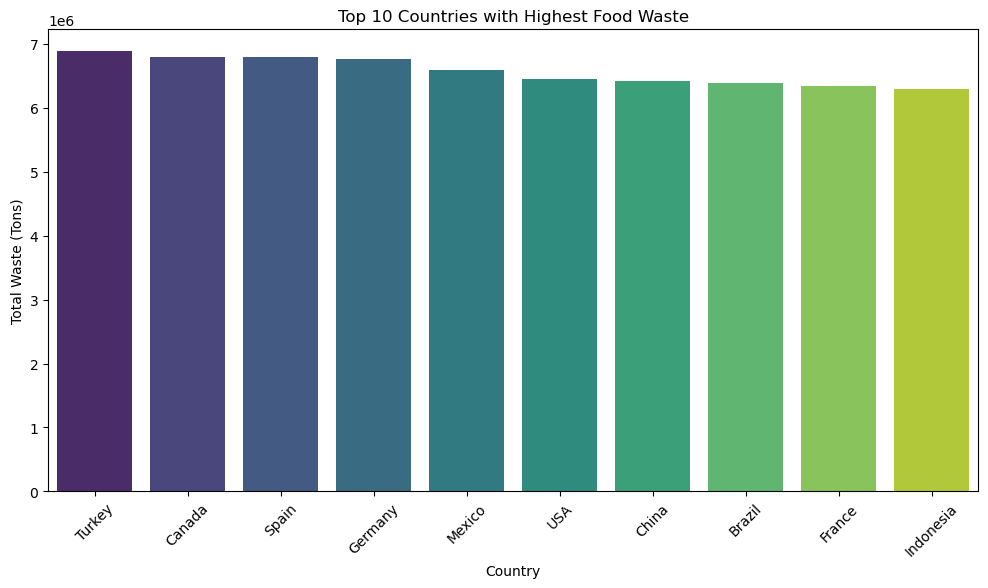

In [26]:
top_countries = df.groupby("Country")["Total Waste (Tons)"].sum().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette="viridis", legend=False)
plt.title("Top 10 Countries with Highest Food Waste")
plt.xlabel("Country")
plt.ylabel("Total Waste (Tons)")
plt.xticks(rotation=45)
plt.show()

# What Food Category is Wasted the Most?

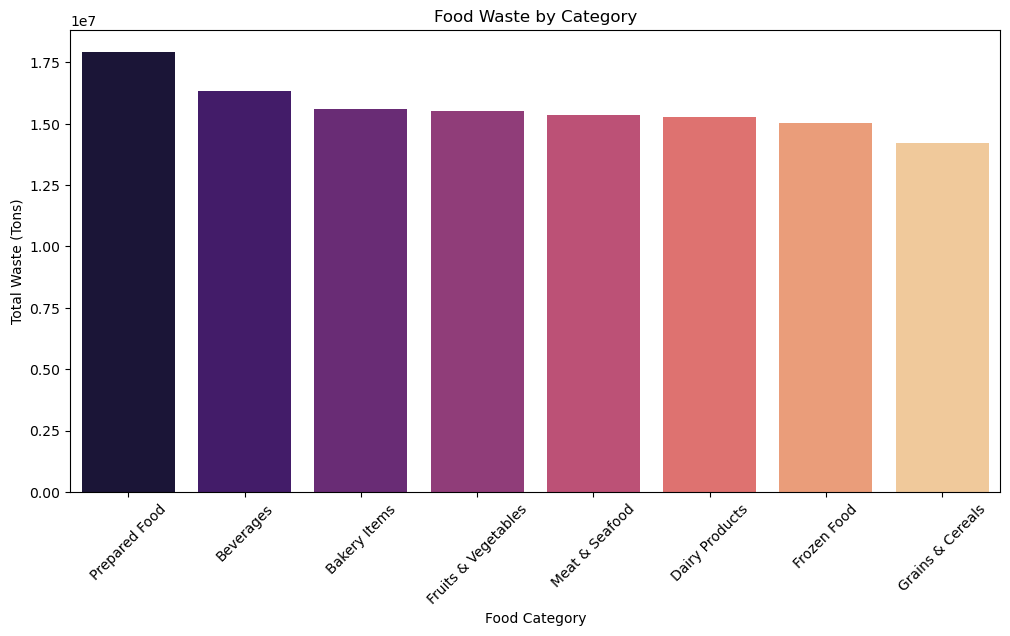

In [36]:
food_waste = df.groupby("Food Category")["Total Waste (Tons)"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=food_waste.index, y=food_waste.values, hue=food_waste.index, palette="magma", legend=False) 
plt.title("Food Waste by Category")
plt.xlabel("Food Category")
plt.ylabel("Total Waste (Tons)")
plt.xticks(rotation=45)
plt.show()

# Trend of Food Wastage Over the Years

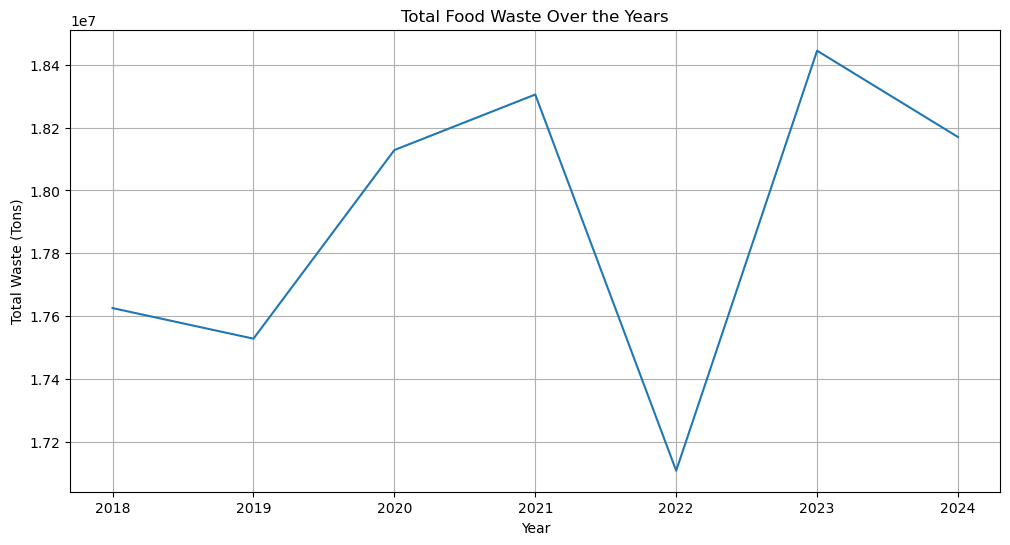

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Total Waste (Tons)", data=df, estimator="sum", errorbar=None) 
plt.title("Total Food Waste Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Waste (Tons)")
plt.grid(True)
plt.show()

# Visualizing Economic Loss by Food Category

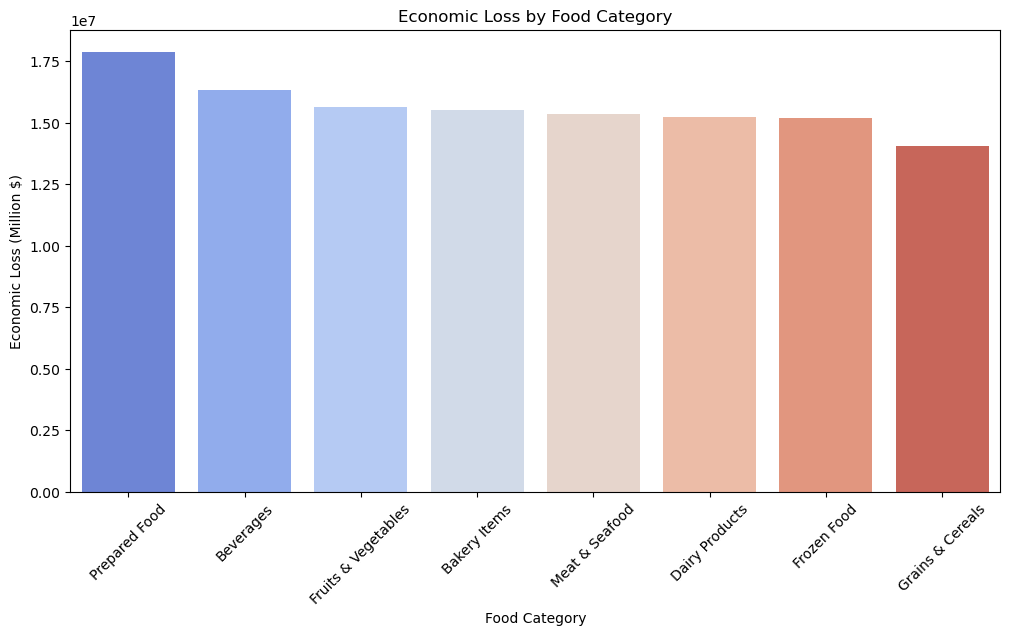

In [38]:
economic_loss = df.groupby("Food Category")["Economic Loss (Million $)"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=economic_loss.index, y=economic_loss.values, hue=economic_loss.index, palette="coolwarm", legend=False)  
plt.title("Economic Loss by Food Category")
plt.xlabel("Food Category")
plt.ylabel("Economic Loss (Million $)")
plt.xticks(rotation=45)
plt.show()

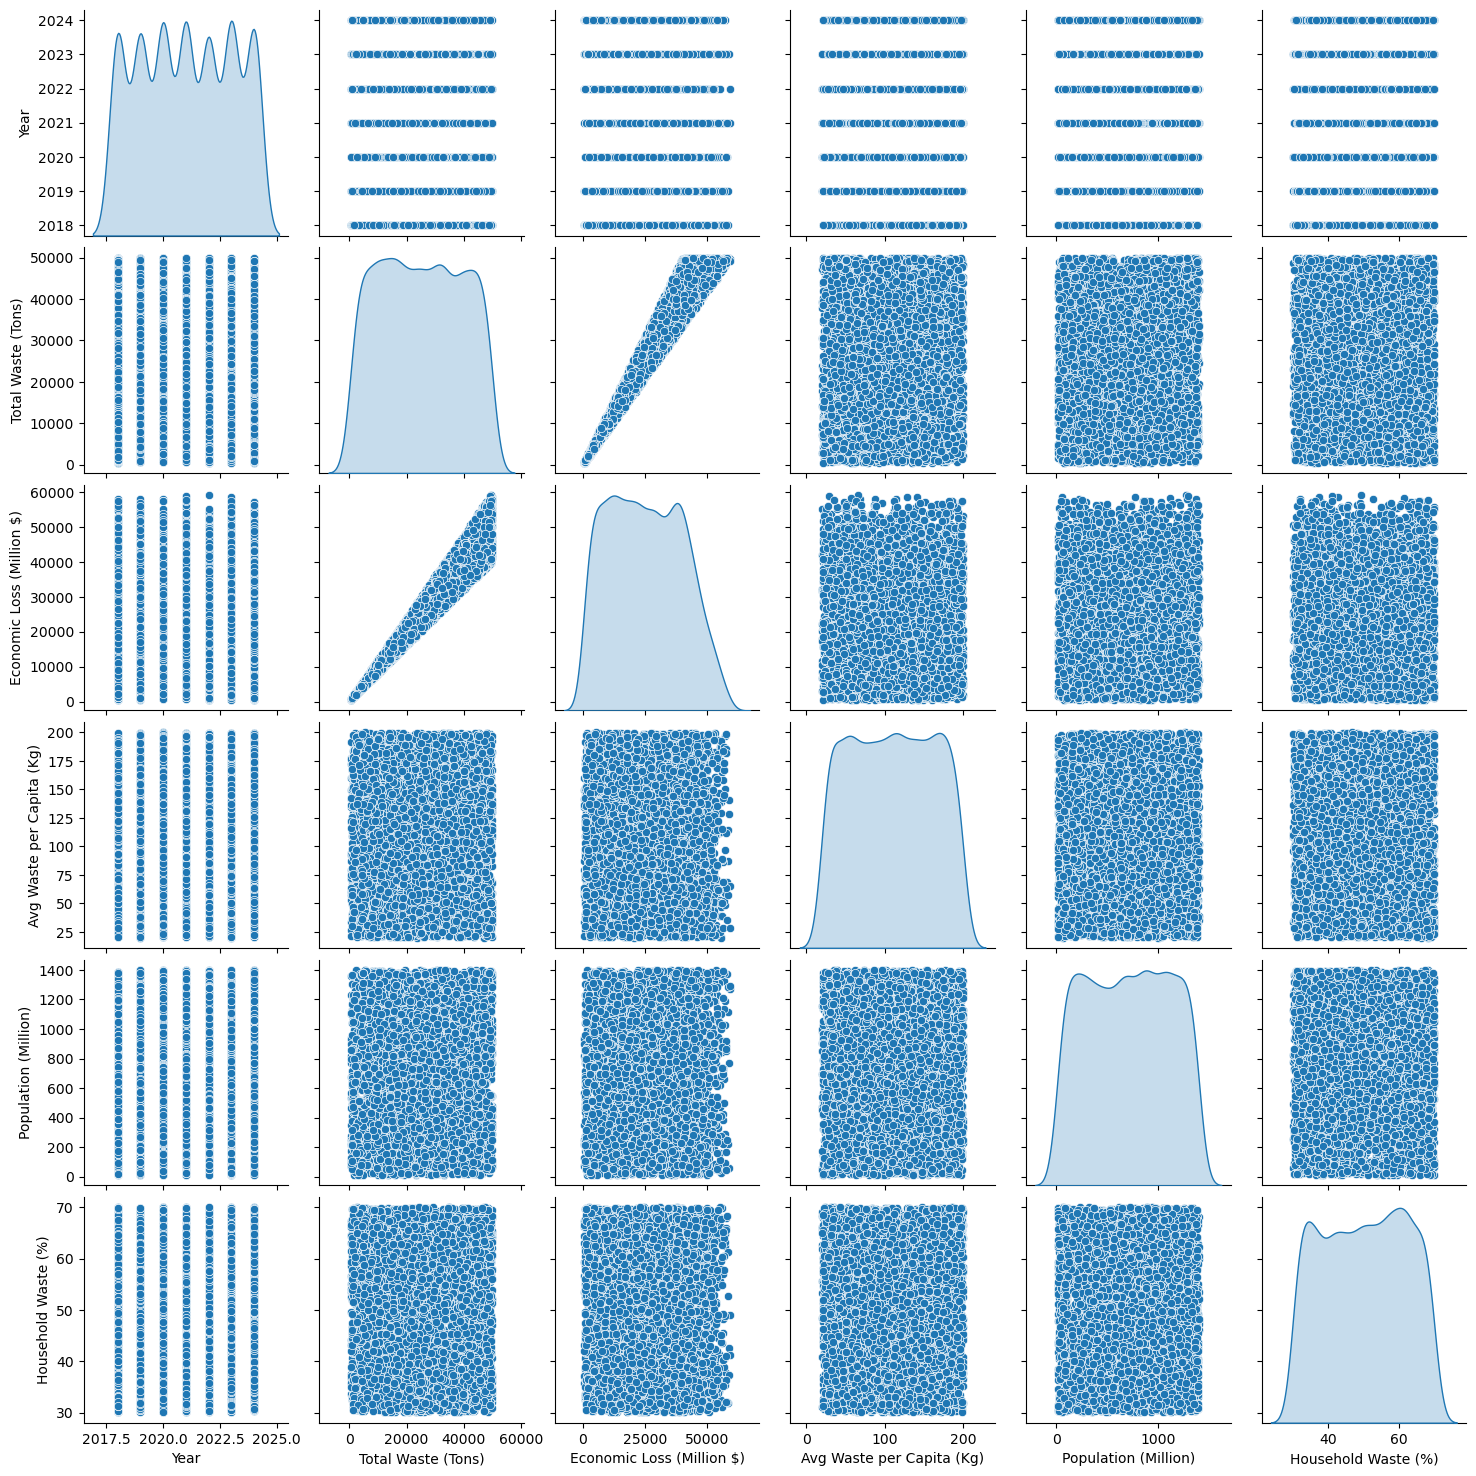

In [33]:
# visualize pairwise relationships between numeric datatype columns in dataset

numeric_df = df.select_dtypes(include=['number'])
sns.pairplot(numeric_df, diag_kind="kde")  
plt.show()

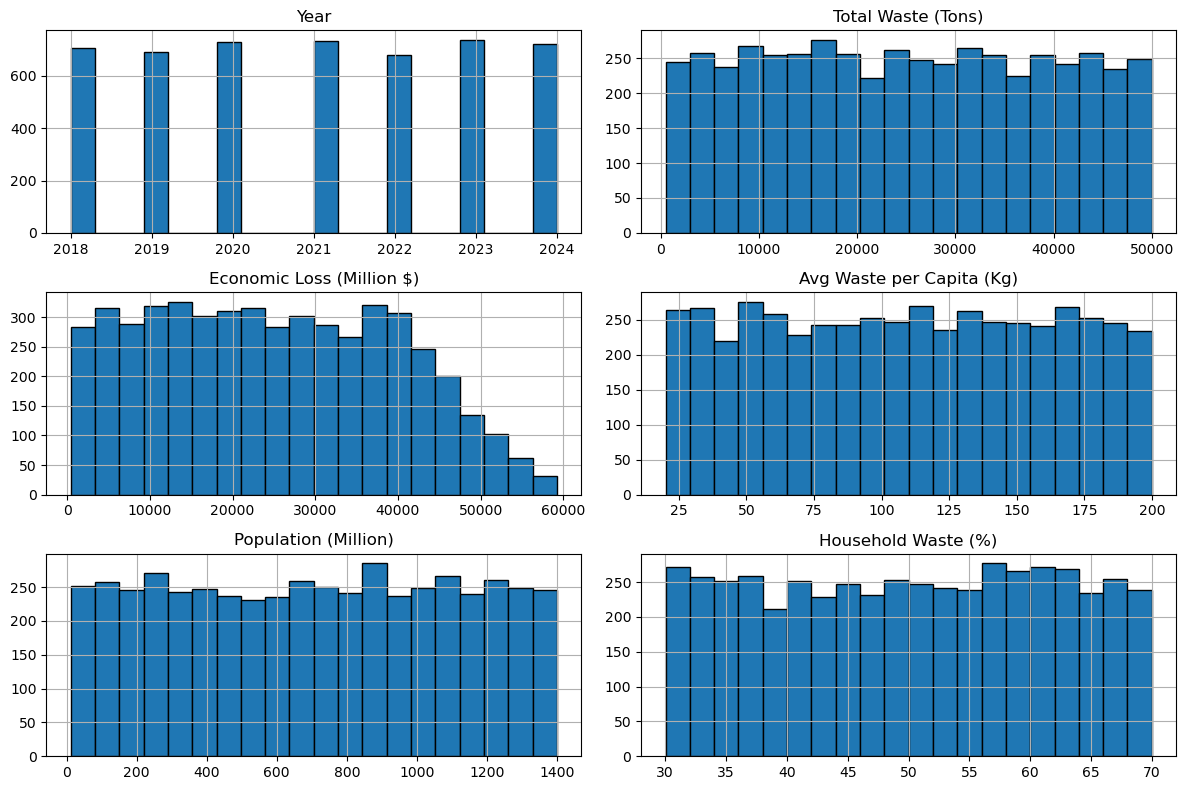

In [34]:
# plot histograms for each numeric datatype columns in dataset

numeric_df = df.select_dtypes(include=['number'])
numeric_df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

Correlation Matrix

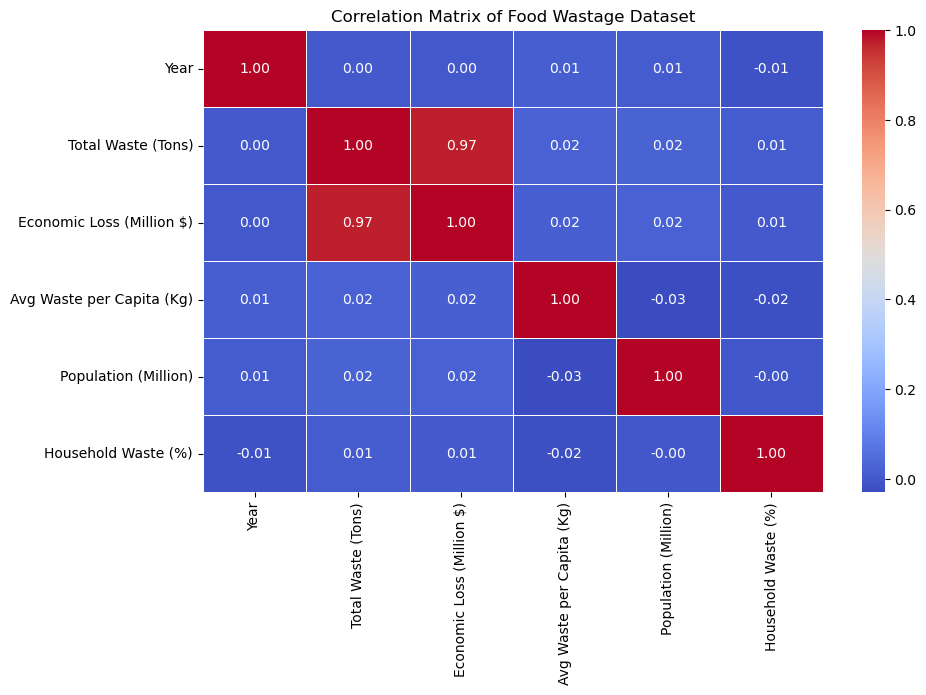

In [40]:
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Food Wastage Dataset")
plt.show()